In [1]:
!pip install tqdm 

In [2]:
import tqdm 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
## Sensor data 

# date:yyyy-mm-dd	
# time:hh:mm:ss.xxx
# epoch:int
# moteid:int 
# temperature:real
# humidity:real
# light:real
# voltage:real


data = pd.read_csv('/media/yido/additional/research/BanditsProject/k_submodular/sensor_data.txt', 
                   sep='\s+', 
                   names=['date', 'time', 'epoch', 'mote_id', 'temperature', 'humidity', 'light', 'voltage'])

# filter out nans 
data = data.dropna()
# remove anomalous temperatures 
data = data[data['temperature'] <= 40.] 
data = data[data['temperature'] >= -10] 
data = data[data['humidity'] >= 0]
data = data[data['humidity'] <= 100]


data = data[data['light'] <= 100_000]


data 

,date,time,epoch,mote_id,temperature,humidity,light,voltage
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.4629,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.8039,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.8379,45.08,2.69964
5,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.9401,45.08,2.68742
...,...,...,...,...,...,...,...,...
2313148,2004-04-02,09:06:21.488182,62421,58.0,24.1730,21.6575,1729.60,2.78836
2313149,2004-04-02,09:07:22.173243,62423,58.0,24.1436,21.7310,1729.60,2.78836
2313150,2004-04-02,09:07:52.31387,62424,58.0,24.1436,21.6575,1670.72,2.78836
2313151,2004-04-02,09:08:52.189274,62426,58.0,24.1240,21.5839,1670.72,2.78836


In [4]:
epochs = data['epoch'].unique()

mote_ids = data['mote_id'].unique()


In [6]:
readings = []
cols = []
for m in tqdm.tqdm(mote_ids):
    device_readings = []
    device_data = data[data['mote_id'] == m]
    
    cols.append(f'temp_{int(m)}')
    
    for e in epochs:
        val = device_data[device_data['epoch'] == e]['temperature'].to_list()
        if val:
            device_readings.append(val[0])
        else:
            device_readings.append(np.nan)
            
    assert len(device_readings) == len(epochs)
    readings.append(device_readings)
    
readings = np.vstack(readings).T

100%|██████████| 55/55 [28:50<00:00, 31.47s/it]


In [7]:
temp_df = pd.DataFrame(readings, columns=cols)
dict(temp_df[['temp_1', 'temp_3', 'temp_4']].groupby(['temp_1', 'temp_3', 'temp_4']).size())
# readings 

{(17.2052, 17.6364, 18.0382): 1,
 (17.2052, 17.6658, 18.048): 1,
 (17.2052, 17.6756, 18.048): 1,
 (17.2052, 17.6952, 18.048): 1,
 (17.215, 17.6756, 18.048): 1,
 (17.2248, 17.6854, 18.0578): 1,
 (17.2444, 17.6952, 18.0578): 1,
 (17.2444, 17.6952, 18.0676): 1,
 (17.2542, 17.6854, 18.048): 1,
 (17.2542, 17.6952, 18.0774): 1,
 (17.2738, 17.7736, 18.1264): 1,
 (17.2836, 17.7834, 18.1362): 1,
 (17.2934, 17.754, 18.1166): 1,
 (17.3032, 17.7638, 18.1754): 1,
 (17.313, 17.6952, 18.1068): 1,
 (17.3228, 17.7736, 18.195): 1,
 (17.3228, 17.7932, 18.1656): 1,
 (17.3228, 17.7932, 18.2146): 1,
 (17.3522, 17.5776, 18.0676): 1,
 (17.3522, 17.8324, 18.3224): 1,
 (17.362000000000002, 17.5776, 18.0676): 1,
 (17.362000000000002, 17.607, 18.0676): 1,
 (17.362000000000002, 17.6168, 18.0872): 1,
 (17.3718, 17.607, 18.0676): 1,
 (17.3718, 17.656, 18.1166): 1,
 (17.3718, 17.6756, 18.1264): 1,
 (17.3816, 17.607, 18.1068): 1,
 (17.3816, 17.6168, 18.0676): 1,
 (17.3816, 17.6168, 18.1264): 1,
 (17.3816, 17.6168, 18.

In [11]:
temp_df.to_csv('temp_data.csv')

In [15]:
hum_readings = []
cols = []
for m in tqdm.tqdm(mote_ids):
    device_readings = []
    device_data = data[data['mote_id'] == m]
    
    cols.append(f'humidity_{int(m)}')
    
    for e in epochs:
        val = device_data[device_data['epoch'] == e]['humidity'].to_list()
        if val:
            device_readings.append(val[0])
        else:
            device_readings.append(np.nan)
            
    assert len(device_readings) == len(epochs)
    hum_readings.append(device_readings)
    
hum_readings = np.vstack(hum_readings).T

100%|██████████| 55/55 [28:58<00:00, 31.61s/it]


In [18]:
humidity_df = pd.DataFrame(hum_readings, columns=cols)
humidity_df.to_csv('humidity_data.csv')

In [ ]:
# humidity_df['humidity_1'], 
# data[(data['epoch'] == epochs[2]) &(data['mote_id'] == 3.)]


In [44]:
humidity_df

,humidity_1,humidity_2,humidity_3,humidity_4,humidity_6,humidity_7,humidity_8,humidity_9,humidity_10,humidity_11,...,humidity_48,humidity_49,humidity_50,humidity_51,humidity_52,humidity_53,humidity_54,humidity_55,humidity_56,humidity_58
0,37.0933,NaN,NaN,38.4629,NaN,NaN,NaN,NaN,NaN,NaN,...,38.1897,35.7148,NaN,37.7792,38.7698,NaN,NaN,NaN,32.3698,21.6575
1,38.4629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7000,22.0985
2,38.8039,NaN,38.8039,38.9742,NaN,39.1443,NaN,NaN,40.9730,41.7133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3969,NaN
3,38.8379,NaN,NaN,39.0763,NaN,39.2123,NaN,NaN,NaN,41.5789,...,39.4502,NaN,NaN,NaN,NaN,45.5391,46.0326,NaN,34.5360,NaN
4,38.9401,NaN,38.8720,39.2123,39.2123,39.3483,NaN,NaN,41.3098,NaN,...,39.4842,NaN,42.6516,NaN,40.5680,NaN,46.0655,NaN,34.7445,22.9414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.6144,NaN,NaN,NaN,NaN,47.9942,NaN,NaN,NaN,NaN
63424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.0655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.6232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
light_readings = []
cols = []
for m in tqdm.tqdm(mote_ids):
    device_readings = []
    device_data = data[data['mote_id'] == m]
    
    cols.append(f'light_{int(m)}')
    
    for e in epochs:
        val = device_data[device_data['epoch'] == e]['light'].to_list()
        if val:
            device_readings.append(val[0])
        else:
            device_readings.append(np.nan)
            
    assert len(device_readings) == len(epochs)
    light_readings.append(device_readings)
    
light_readings = np.vstack(light_readings).T

100%|██████████| 55/55 [30:04<00:00, 32.80s/it]


In [94]:
# filtered_mote_ids = [k for k, v in dict(data.groupby(['mote_id']).count()['date']).items()]
# ## filter by mote_ids 
# data = data[data['mote_id'].isin(filtered_mote_ids)]

# # len(filtered_mote_ids)
# epochs = data['epoch'].unique()

# active_epochs = [ k for k, v in dict(data.groupby(['epoch']).size()).items()]
# len(active_epochs)



# # data[data['epoch'] == active_epochs [1]].shape 
# temp = np.ones((len(active_epochs), len(filtered_mote_ids))) * np.nan 
# humidity = np.ones((len(active_epochs), len(filtered_mote_ids))) * np.nan 
# light = np.ones((len(active_epochs), len(filtered_mote_ids))) * np.nan

# for i, e in enumerate(active_epochs[:1000]):
#     epoch_data = data[data['epoch'] == e]
#     temp_values = dict(zip(epoch_data['mote_id'], epoch_data['temperature']))
#     humidity_values = dict(zip(epoch_data['mote_id'], epoch_data['humidity']))
#     light_values = dict(zip(epoch_data['mote_id'], epoch_data['light']))
    
#     for k, v in temp_values.items():
#         temp[i][filtered_mote_ids.index(k)] = v
        
    
#     for k, v in humidity_values.items():
#         humidity[i][filtered_mote_ids.index(k)] = v
        
#     for k, v in light_values.items():
#         light[i][filtered_mote_ids.index(k)] = v
 

In [141]:
active_epochs = [ k for k, v in dict(data.groupby(['epoch']).size()).items() if v > 35 ]
len(active_epochs)

8409

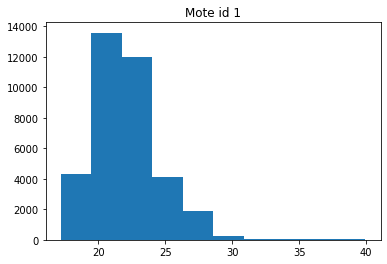

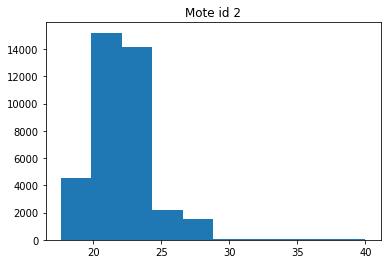

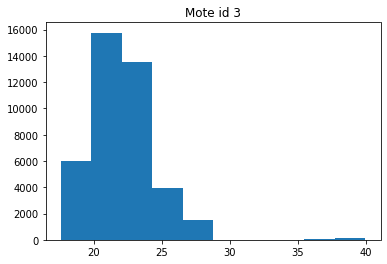

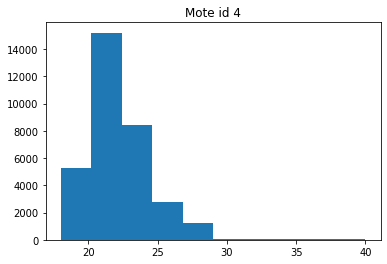

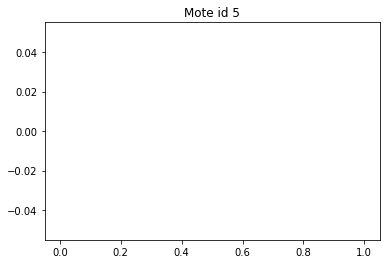

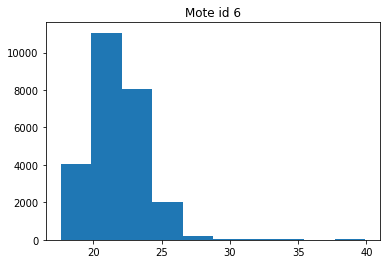

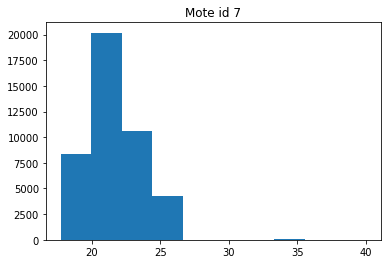

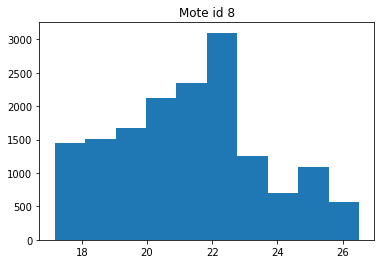

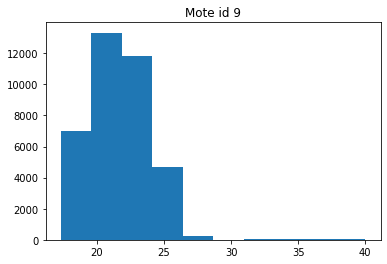

<Figure size 432x288 with 0 Axes>

In [109]:
for i in range(1, 10):
    plt.hist(data[data['mote_id'] == i]['temperature'])
    plt.title(f'Mote id {i}')
    plt.figure()

## Temperature 

In [110]:

min_temp, max_temp = data['temperature'].min(), data['temperature'].max()
print(f'Min temperature {min_temp}, Max temperature {max_temp}')

bin_width = 2
labels = list(range(int(min_temp), int(max_temp)+1, bin_width))

print(len(labels))

# data['temperature_binned'] = 
data['temperature_binned'] = pd.cut(data['temperature'], bins=len(labels), labels=labels)
# for mote_id, i

Min temperature -9.8036, Max temperature 40.0
25


# Humidity 

In [111]:
min_hum, max_hum = data['humidity'].min(), data['humidity'].max()
print(f'Min humidity {min_hum}, Max humidity {max_hum}')


bin_width = 5
labels = list(range(int(min_hum), int(max_hum)+1, bin_width))
print(labels, len(labels))

# data['temperature_binned'] = 
data['humidity_binned'] = pd.cut(data['humidity'], bins=len(labels), labels=labels)
# for mote_id, i


Min humidity 0.42112, Max humidity 64.83
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60] 13


## Light 

In [112]:
min_light, max_light = data['light'].min(), data['light'].max()
print(f'Min light {min_light}, Max light {max_light}')

bin_width = 100
labels = list(range(int(min_light), int(max_light)+1, bin_width))
print(labels, len(labels))

# data['temperature_binned'] = 
data['light_binned'] = pd.cut(data['light'], bins=len(labels), labels=labels)



Min light 3.07716e-15, Max light 1847.36
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800] 19


In [113]:
data 

,date,time,epoch,mote_id,temperature,humidity,light,voltage,temperature_binned,humidity_binned,light_binned
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964,19,35,0
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.4629,45.08,2.68742,19,35,0
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.8039,45.08,2.68742,19,35,0
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.8379,45.08,2.69964,19,35,0
5,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.9401,45.08,2.68742,19,35,0
...,...,...,...,...,...,...,...,...,...,...,...
2313148,2004-04-02,09:06:21.488182,62421,58.0,24.1730,21.6575,1729.60,2.78836,25,20,1700
2313149,2004-04-02,09:07:22.173243,62423,58.0,24.1436,21.7310,1729.60,2.78836,25,20,1700
2313150,2004-04-02,09:07:52.31387,62424,58.0,24.1436,21.6575,1670.72,2.78836,25,20,1700
2313151,2004-04-02,09:08:52.189274,62426,58.0,24.1240,21.5839,1670.72,2.78836,25,20,1700


In [114]:
mote_ids = data['mote_id'].unique()

temperature_data, humidity_data, light_data = {}, {}, {}

for m in mote_ids:
    #
    temperature_data[int(m)] = data[data['mote_id'] == m]['temperature_binned'].to_list()
    humidity_data[int(m)] = data[data['mote_id'] == m]['humidity_binned'].to_list()
    light_data[int(m)] = data[data['mote_id'] == m]['light_binned'].to_list()
    

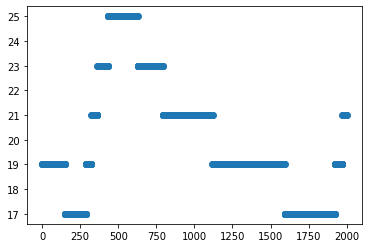

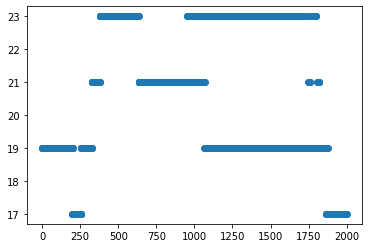

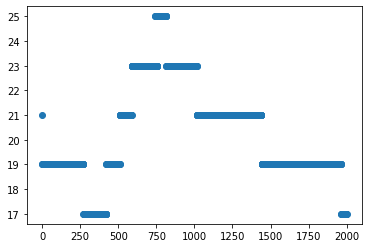

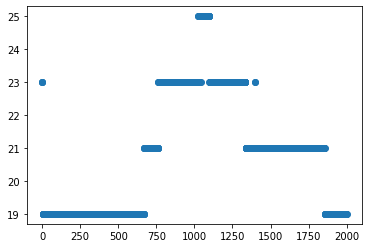

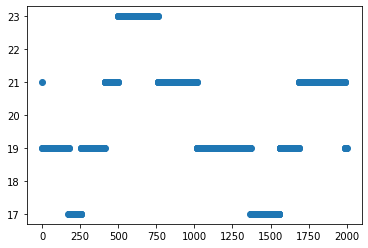

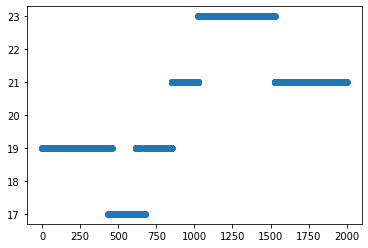

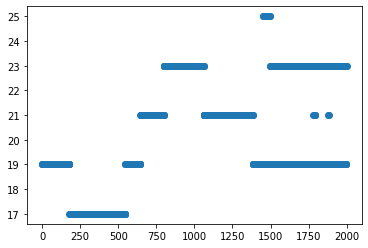

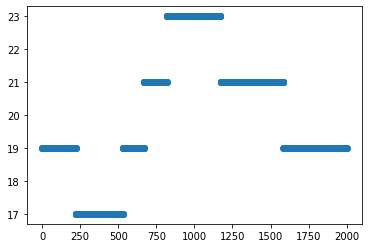

<Figure size 432x288 with 0 Axes>

In [115]:
for i in range(1, 10):
    if i in mote_ids:

        plt.scatter(range(2000), temperature_data[i][:2000])
        plt.figure()

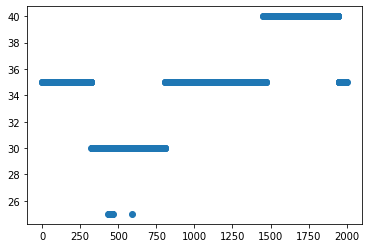

In [116]:
plt.scatter(range(2000), humidity_data[1][:2000])

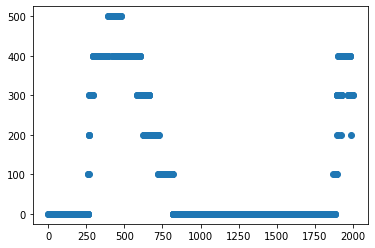

In [117]:
plt.scatter(range(2000), light_data[1][:2000])

In [130]:
import numpy as np 


def calculate_entropy(raw_data):
    items = list(set(raw_data)) # get the items 
    # calculate freqs 
    freqs = [raw_data.count(i) / len(raw_data) for i in items]

    entropy = - np.sum(np.array(freqs) * np.log(freqs))
    
    return entropy


cut_off = 3000
print(calculate_entropy(temperature_data[1][:cut_off] ))
print(calculate_entropy(temperature_data[1][:cut_off] + temperature_data[2][:cut_off] ))
print(calculate_entropy(temperature_data[1][:cut_off] + temperature_data[2][:cut_off] + temperature_data[3][:cut_off] ))

1.3878262536761536
1.3645090667466535
1.361592660850745


In [129]:
len(temperature_data[1]), len(temperature_data[2]), len(temperature_data[3])

(36418, 37839, 40991)

## Calculating the entropies 

## Calcuate frequencies, multiply by the frequencies 

In [349]:
import numpy as np 


def calculate_entropy(raw_data):
    print(len(raw_data))
    items = list(set(raw_data)) # get the items 
    # calculate freqs 
    freqs = [raw_data.count(i) / len(raw_data) for i in items]

    entropy = - np.sum(np.array(freqs) * np.log(freqs))
    
    return entropy





In [350]:
temperature_entropies = { k:calculate_entropy(v) for k, v in temperature_data.items() }
humidity_entropies = { k:calculate_entropy(v) for k, v in humidity_data.items() }
light_entropies = { k:calculate_entropy(v) for k, v in light_data.items() }

36418
37839
40991
33190
25560
43573
15792
37330
34970
34437
16452
21778
22357
1801
25921
28155
20722
29642
28811
49370
54977
48330
41872
42991
43574
27818
47433
24966
52616
30027
26100
34358
37986
45274
34839
36831
26195
39706
36795
39065
32853
43937
53157
45961
54614
55794
31462
15737
36739
29553
22094
22917
2850
2372
4497
36418
37839
40991
33190
25560
43573
15792
37330
34970
34437
16452
21778
22357
1801
25921
28155
20722
29642
28811
49370
54977
48330
41872
42991
43574
27818
47433
24966
52616
30027
26100
34358
37986
45274
34839
36831
26195
39706
36795
39065
32853
43937
53157
45961
54614
55794
31462
15737
36739
29553
22094
22917
2850
2372
4497
36418
37839
40991
33190
25560
43573
15792
37330
34970
34437
16452
21778
22357
1801
25921
28155
20722
29642
28811
49370
54977
48330
41872
42991
43574
27818
47433
24966
52616
30027
26100
34358
37986
45274
34839
36831
26195
39706
36795
39065
32853
43937
53157
45961
54614
55794
31462
15737
36739
29553
22094
22917
2850
2372
4497


In [352]:
temperature_entropies[1], humidity_entropies[1], light_entropies[1]

(1.6127370905812382, 1.4411920587544755, 1.3735993285570365)

## Save Data 

In [353]:
import pickle 
data = {
    'temperature_entropies': temperature_entropies,
    'humidity_entropies': humidity_entropies,
    'light_entropies': light_entropies,
    'locations': mote_ids
}

with open('../k_submodular/sensor_placement/sensor_data.pkl', 'wb') as f:
    pickle.dump(data, f)